In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tifffile import imread
import os

def show_fft_per_channel(image_path, vmax_percentile=99):
    """
    For an OME.TIFF image, display the Fourier spectrum for each channel.
    
    Parameters:
    - image_path: Path to the image
    - vmax_percentile: Percentile of spectrum intensity used for contrast enhancement (default 99)

    Requirements:
    - Image shape: (C, H, W) or (Z, C, H, W) (Z will be handled automatically)
    """
    img = imread(image_path)

    # Automatically determine image dimensions
    if img.ndim == 4:
        # Shape may be (Z, C, H, W), select Z=0
        img = img[0]
    elif img.ndim != 3:
        raise ValueError(f"Unsupported image shape: {img.shape}")

    # n_channels = img.shape[0]
    n_channels = 2
    fig, axes = plt.subplots(1, n_channels, figsize=(4 * n_channels, 4))

    if n_channels == 1:
        axes = [axes]

    for i in range(n_channels):
        channel = img[i]
        f_transform = np.fft.fftshift(np.fft.fft2(channel))
        magnitude = np.log1p(np.abs(f_transform))
        vmax = np.percentile(magnitude, vmax_percentile)

        ax = axes[i]
        ax.imshow(magnitude, cmap='gray', vmax=vmax)
        ax.set_title(f'Channel {i}')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tifffile import imread
import os

def show_fft_per_channel(image_path, vmax_percentile=99):
    img = imread(image_path)

    if img.ndim == 4:
        img = img[0]
    elif img.ndim != 3:
        raise ValueError(f"Unsupported image shape: {img.shape}")

    # n_channels = img.shape[0]
    n_channels = 2
    fig, axes = plt.subplots(1, n_channels, figsize=(4 * n_channels, 4))

    if n_channels == 1:
        axes = [axes]

    for i in range(n_channels):
        channel = img[i]
        f_transform = np.fft.fftshift(np.fft.fft2(channel))
        magnitude = np.log1p(np.abs(f_transform))
        vmax = np.percentile(magnitude, vmax_percentile)

        ax = axes[i]
        ax.imshow(magnitude, cmap='gray', vmax=vmax)
        ax.set_title(f'Channel {i}')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

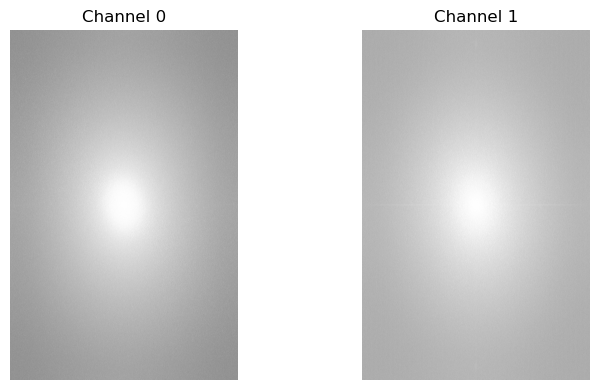

In [4]:
file_name = "/Users/kuangda/Developer/1-projects/4-codex-analysis/data/uterus/D16/Scan1/D16_Scan1_manual_0.ome.tiff"
show_fft_per_channel(file_name)

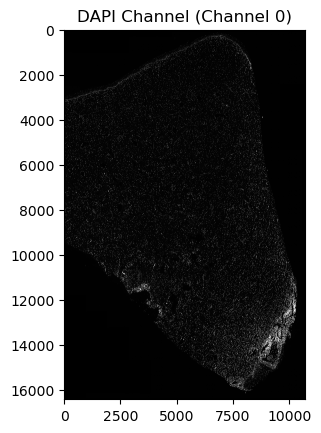

In [3]:
file_name = "/Users/kuangda/Developer/1-projects/4-codex-analysis/data/uterus/D16/Scan1/D16_Scan1_manual_0.ome.tiff"
img = imread(file_name)
plt.imshow(img[0], cmap='gray')
plt.title('DAPI Channel (Channel 0)')
plt.show()

In [5]:
img.shape

(39, 16424, 10701)

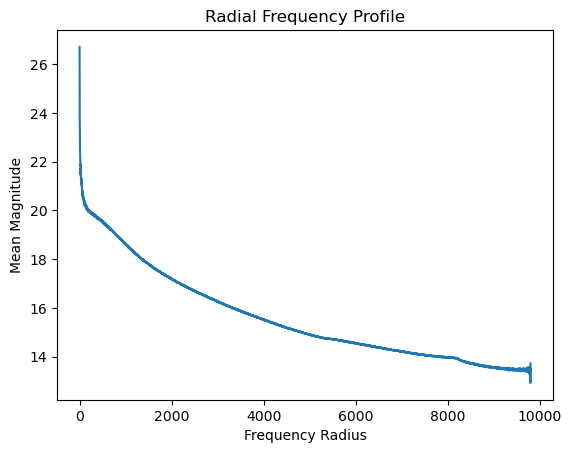

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def radial_profile(magnitude):
    y, x = np.indices(magnitude.shape)
    center = np.array(magnitude.shape) // 2
    r = np.sqrt((x - center[1])**2 + (y - center[0])**2).astype(np.int32)
    r_bins = np.bincount(r.ravel(), magnitude.ravel())
    counts = np.bincount(r.ravel())
    return r_bins / (counts + 1e-8)

# 使用方法
# img = img[0]
fft = np.fft.fftshift(np.fft.fft2(img[0]))
mag = np.log1p(np.abs(fft))
profile = radial_profile(mag)

plt.plot(profile)
plt.title("Radial Frequency Profile")
plt.xlabel("Frequency Radius")
plt.ylabel("Mean Magnitude")
plt.show()

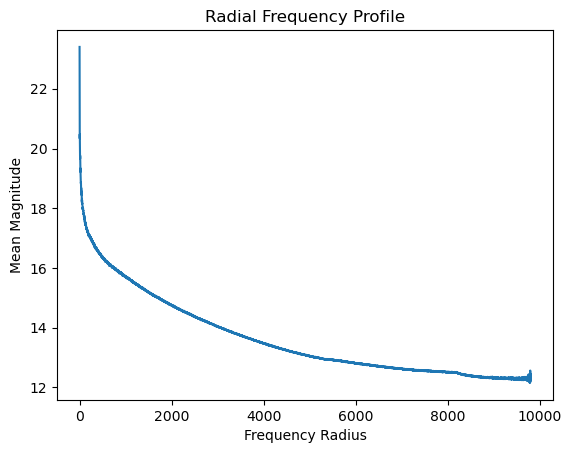

In [6]:
fft = np.fft.fftshift(np.fft.fft2(img[1]))
mag = np.log1p(np.abs(fft))
profile = radial_profile(mag)

plt.plot(profile)
plt.title("Radial Frequency Profile")
plt.xlabel("Frequency Radius")
plt.ylabel("Mean Magnitude")
plt.show()

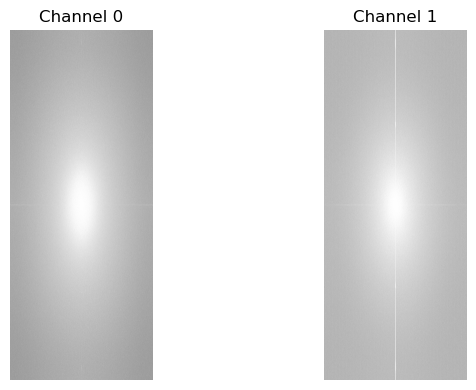

In [5]:
file_name = "/Users/kuangda/Developer/1-projects/4-codex-analysis/data/uterus/D16/Scan1/D16_Scan1_manual_1.ome.tiff"
show_fft_per_channel(file_name)

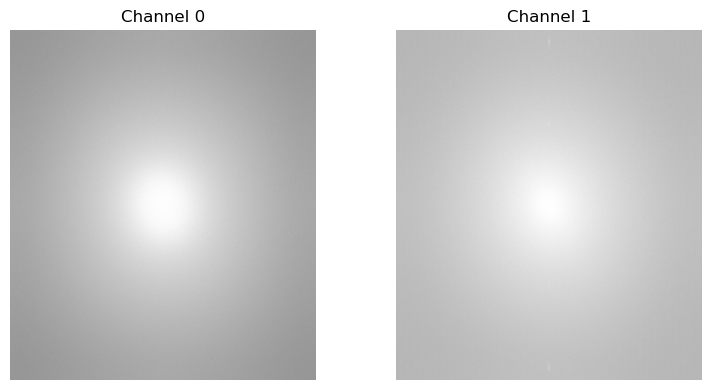

In [8]:
file_name = "/Users/kuangda/Developer/1-projects/4-codex-analysis/data/uterus/D16/Scan1/D16_Scan1_manual_2.ome.tiff"
show_fft_per_channel(file_name)

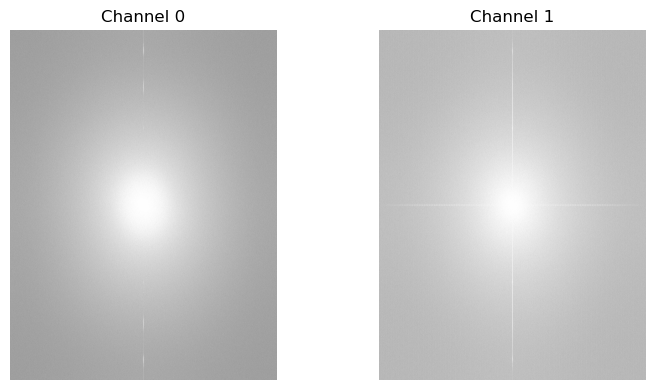

In [6]:
file_name = "/Users/kuangda/Developer/1-projects/4-codex-analysis/data/FallopianTube/D18/Scan1/D18_Scan1_tissue_0.ome.tiff"
show_fft_per_channel(file_name)

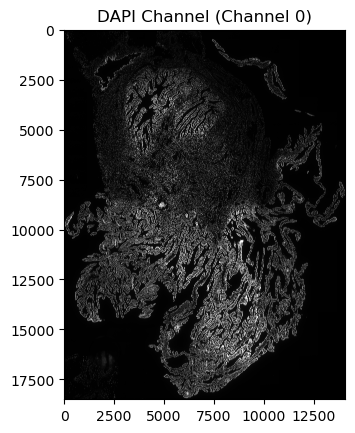

In [7]:
file_name = "/Users/kuangda/Developer/1-projects/4-codex-analysis/data/FallopianTube/D18/Scan1/D18_Scan1_tissue_0.ome.tiff"
img = imread(file_name)
plt.imshow(img[0], cmap='gray')
plt.title('DAPI Channel (Channel 0)')
plt.show()

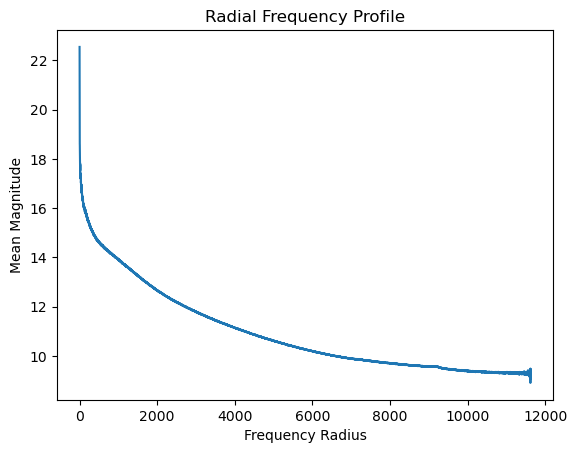

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def radial_profile(magnitude):
    y, x = np.indices(magnitude.shape)
    center = np.array(magnitude.shape) // 2
    r = np.sqrt((x - center[1])**2 + (y - center[0])**2).astype(np.int32)
    r_bins = np.bincount(r.ravel(), magnitude.ravel())
    counts = np.bincount(r.ravel())
    return r_bins / (counts + 1e-8)

# 使用方法
# img = img[0]
fft = np.fft.fftshift(np.fft.fft2(img[0]))
mag = np.log1p(np.abs(fft))
profile = radial_profile(mag)

plt.plot(profile)
plt.title("Radial Frequency Profile")
plt.xlabel("Frequency Radius")
plt.ylabel("Mean Magnitude")
plt.show()

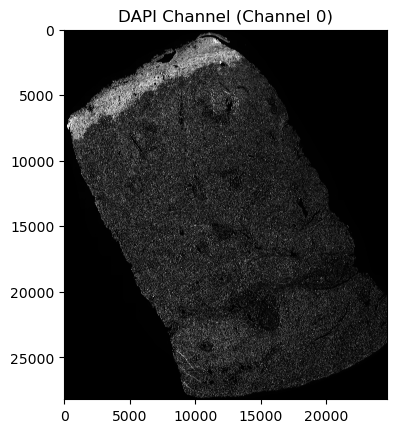

In [9]:
file_name = "/Users/kuangda/Developer/1-projects/4-codex-analysis/data/uterus/D16/Scan1/D16_Scan1_manual_2.ome.tiff"
img = imread(file_name)
plt.imshow(img[0], cmap='gray')
plt.title('DAPI Channel (Channel 0)')
plt.show()

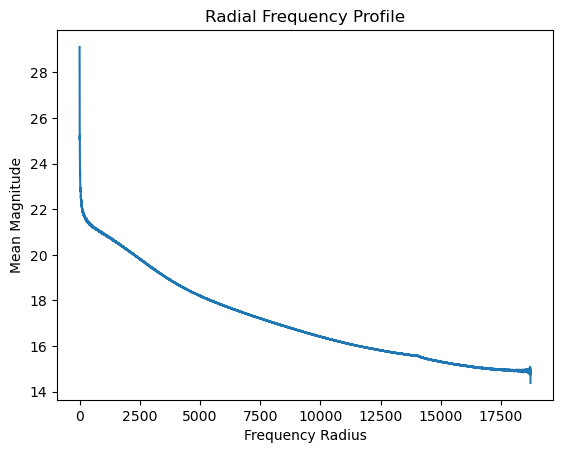

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def radial_profile(magnitude):
    y, x = np.indices(magnitude.shape)
    center = np.array(magnitude.shape) // 2
    r = np.sqrt((x - center[1])**2 + (y - center[0])**2).astype(np.int32)
    r_bins = np.bincount(r.ravel(), magnitude.ravel())
    counts = np.bincount(r.ravel())
    return r_bins / (counts + 1e-8)

# 使用方法
# img = img[0]
fft = np.fft.fftshift(np.fft.fft2(img[0]))
mag = np.log1p(np.abs(fft))
profile = radial_profile(mag)

plt.plot(profile)
plt.title("Radial Frequency Profile")
plt.xlabel("Frequency Radius")
plt.ylabel("Mean Magnitude")
plt.show()